In [287]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler#표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler#정규화
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from IPython.display import Image
# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
import numpy as np
np.random.seed(5)

In [288]:
import warnings
warnings.filterwarnings('ignore')

In [289]:
df=pd.read_csv("/content/Heart.csv")
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [290]:
df.drop(columns=["Unnamed: 0","ExAng"], inplace=True)

In [291]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   Oldpeak    303 non-null    float64
 9   Slope      303 non-null    int64  
 10  Ca         299 non-null    float64
 11  Thal       301 non-null    object 
 12  AHD        303 non-null    object 
dtypes: float64(2), int64(8), object(3)
memory usage: 30.9+ KB


Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [292]:
df.dropna(inplace=True)

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   Oldpeak    297 non-null    float64
 9   Slope      297 non-null    int64  
 10  Ca         297 non-null    float64
 11  Thal       297 non-null    object 
 12  AHD        297 non-null    object 
dtypes: float64(2), int64(8), object(3)
memory usage: 32.5+ KB


In [294]:
df.iloc[:, :-1]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,Oldpeak,Slope,Ca,Thal
0,63,1,typical,145,233,1,2,150,2.3,3,0.0,fixed
1,67,1,asymptomatic,160,286,0,2,108,1.5,2,3.0,normal
2,67,1,asymptomatic,120,229,0,2,129,2.6,2,2.0,reversable
3,37,1,nonanginal,130,250,0,0,187,3.5,3,0.0,normal
4,41,0,nontypical,130,204,0,2,172,1.4,1,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,asymptomatic,140,241,0,0,123,0.2,2,0.0,reversable
298,45,1,typical,110,264,0,0,132,1.2,2,0.0,reversable
299,68,1,asymptomatic,144,193,1,0,141,3.4,2,2.0,reversable
300,57,1,asymptomatic,130,131,0,0,115,1.2,2,1.0,reversable


In [295]:
data=list(set(df['ChestPain'].values))
data

['typical', 'asymptomatic', 'nonanginal', 'nontypical']

In [296]:
encoder=LabelEncoder()
encoder.fit(data) 
df['ChestPain']=encoder.transform(df['ChestPain'])
df['ChestPain'] = df['ChestPain'].astype('category')

In [297]:
data=list(set(df['Thal'].values))
data

['reversable', 'normal', 'fixed']

In [298]:
encoder2=LabelEncoder()
encoder2.fit(data) 
df['Thal']= encoder2.transform(df['Thal'])
df['Thal'] = df['Thal'].astype('category')

In [299]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:, :-1], df.iloc[:,-1],test_size=0.2, random_state=3)

In [300]:
dt=DecisionTreeClassifier(criterion='gini', max_depth = 3, max_features = 8, random_state=100)

In [301]:
svm=SVC( C=100, gamma=100, random_state=35, probability=True, kernel='rbf')

In [302]:
lr = LogisticRegression()

In [303]:
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression()

In [304]:
dt_p = dt.predict(X_test)
svm_p=svm.predict(X_test)
lr_p=lr.predict(X_test)
dt_p ,svm_p, lr_p

(array(['No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
        'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
        'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
        'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
        'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
        'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes'],
       dtype=object),
 array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No'], dtype=object),
 array(['No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
        'No', 'No', 'Yes', 'No', 'No', 'Ye

In [305]:
print("[accuarcy]")
print("d-tree: ",accuracy_score(y_test, dt_p))
print("svm   : ",accuracy_score(y_test, svm_p))
print("logistic   : ",accuracy_score(y_test, lr_p))

[accuarcy]
d-tree:  0.8166666666666667
svm   :  0.5166666666666667
logistic   :  0.8166666666666667


In [306]:
voting_clf=VotingClassifier(
    estimators=[('decision tree', dt),('LogisticRegression', lr ),('svm', svm)], weights=[1,1,1], voting='hard'
).fit(X_train, y_train)

hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted) ## 다수결의 원칙으로 정함. 

0.8

In [307]:
voting_clf=VotingClassifier(
    estimators=[('decision tree', dt),('LogisticRegression', lr ),('svm', svm)], weights=[1,1,1], voting='soft'
).fit(X_train, y_train)

hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.8333333333333334

**정석데이터 사용**

In [308]:
df1=pd.read_csv("/content/wisc_bc_data.csv")
df1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [309]:
df1.info()
df1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [310]:
df2=df1.drop(columns="diagnosis")

In [311]:
X_train,X_test,y_train,y_test = train_test_split(df2, df1["diagnosis"],test_size=0.2, random_state=3)

In [312]:
dt=DecisionTreeClassifier(criterion='gini', max_depth = 3, max_features = 8, random_state=100)
svm=SVC(C=100, gamma=100, random_state=3, probability=True, kernel='rbf')
lr = LogisticRegression()

In [313]:
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)
lr.fit(X_train, y_train)


LogisticRegression()

In [314]:
dt_p = dt.predict(X_test)
svm_p=svm.predict(X_test)
lr_p=lr.predict(X_test)
dt_p ,svm_p, lr_p

(array(['B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M',
        'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
        'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M',
        'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
        'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
        'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
        'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M',
        'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
        'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M'], dtype=object),
 array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
        'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
        'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
        'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
        'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B

In [315]:
print("[accuarcy]")
print("d-tree: ",accuracy_score(y_test, dt_p))
print("svm   : ",accuracy_score(y_test, svm_p))
print("logistic   : ",accuracy_score(y_test, lr_p))

[accuarcy]
d-tree:  0.9035087719298246
svm   :  0.6140350877192983
logistic   :  0.6140350877192983


In [317]:

hard_voting_clf=VotingClassifier(
    estimators=[('decision tree', dt),('LogisticRegression', lr ),('svm', svm)], weights=[1,1,1], voting='hard'
).fit(X_train, y_train)

hard_voting_predicted = hard_voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted) ## 다수결의 원칙으로 정함. 

0.6140350877192983

In [318]:

soft_voting_clf=VotingClassifier(
    estimators=[('decision tree', dt),('LogisticRegression', lr ),('svm', svm)], weights=[1,1,1], voting='soft'
).fit(X_train, y_train)

soft_voting_predicted = soft_voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted) ## 다수결의 원칙으로 정함. 

0.6140350877192983

소프트 보팅이 하드 보팅보다 정확도가 높아서 많이 쓰임

In [319]:
##bagging

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=10
).fit(X_train, y_train)

In [320]:
rf_predt = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predt)
rf_acc

0.9298245614035088

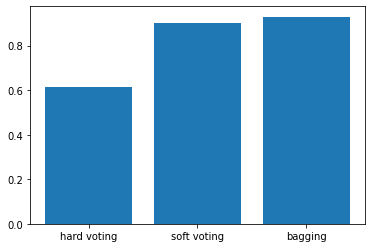

In [321]:
x = np.arange(3)
plt.bar(x, height= [
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted),
                    accuracy_score(y_test, rf_predt)
            ])
plt.xticks(x, ['hard voting','soft voting', 'bagging']);

In [322]:
def print_test_metrics(model, X_test):
    global pred
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print('*** Test Accuracy *** \n   {}'.format(model.score(X_test, y_test)))
    print('\n*** Confusion Matrix *** \n', confusion_matrix(y_test, model.predict(X_test)))
    print('*** Confusion Matrix(precision) ***')
    print(precision_score(y_test, pred, average='macro'))
    print('***classification re(precision) ***')
    print(classification_report(y_test, pred))

In [323]:
print_test_metrics(rf, X_test)

*** Test Accuracy *** 
   0.9298245614035088

*** Confusion Matrix *** 
 [[67  3]
 [ 5 39]]
*** Confusion Matrix(precision) ***
0.9295634920634921
***classification re(precision) ***
              precision    recall  f1-score   support

           B       0.93      0.96      0.94        70
           M       0.93      0.89      0.91        44

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



## 정상이 74명인데, 71명만 정상, 3명은 암환자
## 암환자가 40명인데 39명만 암환자, 1명은 정상
recall(재현율) 이 softvoting보다 높은편.
softvoting model보다는 bagging모델을 선택하는것이 좋다. 

In [326]:
print_test_metrics(soft_voting_clf, X_test)

*** Test Accuracy *** 
   0.9035087719298246

*** Confusion Matrix *** 
 [[66  4]
 [ 7 37]]
*** Confusion Matrix(precision) ***
0.9032743067156699
***classification re(precision) ***
              precision    recall  f1-score   support

           B       0.90      0.94      0.92        70
           M       0.90      0.84      0.87        44

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



In [327]:
print_test_metrics(hard_voting_clf, X_test)

*** Test Accuracy *** 
   0.6140350877192983

*** Confusion Matrix *** 
 [[70  0]
 [44  0]]
*** Confusion Matrix(precision) ***
0.30701754385964913
***classification re(precision) ***
              precision    recall  f1-score   support

           B       0.61      1.00      0.76        70
           M       0.00      0.00      0.00        44

    accuracy                           0.61       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.38      0.61      0.47       114



In [328]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [330]:
gbc=GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
hist=HistGradientBoostingClassifier(random_state=42).fit(X_train, y_train)
xgb=XGBClassifier(random_state=42,).fit(X_train, y_train)
lgbm=LGBMClassifier(random_state=42).fit(X_train, y_train)

In [331]:
gbc_p = gbc.predict(X_test)
hist_p = hist.predict(X_test)
xgb_p = xgb.predict(X_test)
lgbm_p = lgbm.predict(X_test)
lgbm_p ,xgb_p, hist_p, gbc_p

(array(['B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M',
        'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
        'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
        'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
        'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
        'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
        'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M',
        'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
        'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B'], dtype=object),
 array(['B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M',
        'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
        'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
        'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
        'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B

In [332]:
print("[accuarcy]")
print("gbc: ",accuracy_score(y_test, gbc_p))
print("svm   : ",accuracy_score(y_test,hist_p))
print("xgb   : ",accuracy_score(y_test, xgb_p))
print("lgbm   : ",accuracy_score(y_test, lgbm_p))


[accuarcy]
gbc:  0.9473684210526315
svm   :  0.956140350877193
xgb   :  0.9473684210526315
lgbm   :  0.9649122807017544


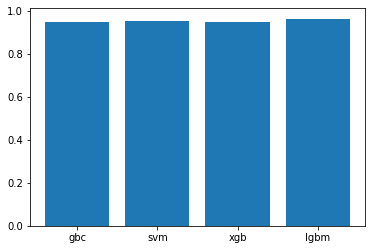

In [333]:
x = np.arange(4)
plt.bar(x, height= [
                    accuracy_score(y_test, gbc_p),
                    accuracy_score(y_test,hist_p),
                    accuracy_score(y_test, xgb_p),
                    accuracy_score(y_test, lgbm_p)
            ])
plt.xticks(x, ['gbc','svm', 'xgb','lgbm' ]);